<a href="https://colab.research.google.com/github/itsbrandonlim/K-NN-Practice/blob/main/K_NN_Brandon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from collections import Counter
from scipy.stats import mode

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, f1_score

# 1

In [ ]:
data = load_iris()
x = data.data
y = data.target

In [ ]:
x_info = pd.DataFrame(x, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
x_info.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42, stratify=y)

# euclidean distance

In [ ]:
def euclidean_dist(e1, e2):
  return np.sqrt(np.sum((e1 - e2) ** 2))

In [ ]:
class KNN_Euclidean:
  def __init__(self, k):
    self.k = k
  
  def fit(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

  def predict(self, x_test):
    y_pred = [self._predict(x_test) for x_test in x_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [euclidean_dist(x_test, x_train) for x_train in self.x_train]
    k_near = np.argsort(dist)[:self.k]
    k_near_class = [self.y_train[i] for i in k_near]
    m_c = Counter(k_near_class).most_common(1)
    return m_c[0][0]

# RMSE

In [ ]:
k_num = []
RMSE_val = []

for k in range(1, 50, 2):
  mod = KNN_Euclidean(k)
  mod.fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  k_num.append(k)
  RMSE_val.append(np.sqrt(mean_squared_error(y_test, y_pred)))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

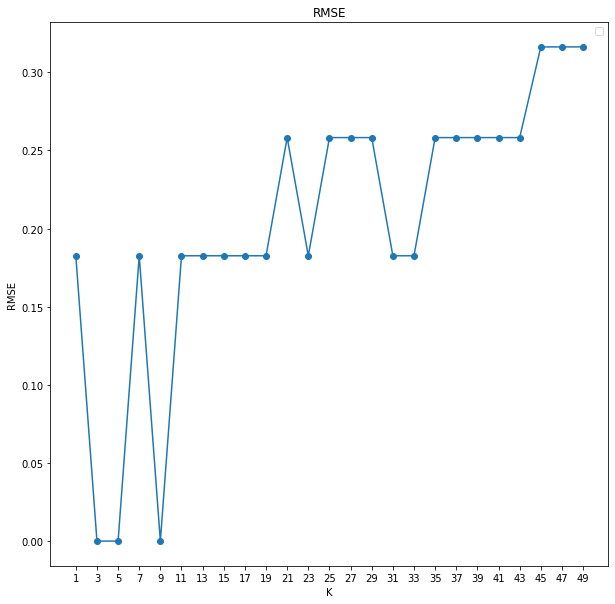

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_num, RMSE_val, "o-")
plt.xticks(np.arange(1, 50, 2))
plt.title('RMSE')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Dapat dilihat, nilai dari k yang paling optimal adalah 3, 5, 9

In [ ]:
# K = 3
mod = KNN_Euclidean(3)
mod.fit(x_train, y_train)

y_pred = mod.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("accuracy:")
print(accuracy)
print("RMSE:")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

accuracy:
1.0
RMSE:
0.0


In [ ]:
# k = 5
mod = KNN_Euclidean(5)
mod.fit(x_train, y_train)

y_pred = mod.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("accuracy:")
print(accuracy)
print("RMSE:")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

accuracy:
1.0
RMSE:
0.0


In [ ]:
# k = 9
mod = KNN_Euclidean(5)
mod.fit(x_train, y_train)

y_pred = mod.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("accuracy:")
print(accuracy)
print("RMSE:")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

accuracy:
1.0
RMSE:
0.0


RMSE untuk semua nilai k yang optimal = 0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



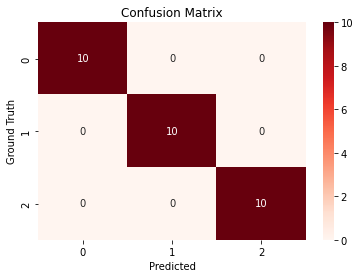

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'Reds', annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()

# 2

# Hamming Distance

In [ ]:
def hamming_dist(e1, e2):
  return sum(f1 != f2 for f1, f2 in zip(e1, e2))

In [ ]:
class KNN_EuclideanH:
  def __init__(self, k):
    self.k = k
  
  def fit(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

  def predict(self, x_test):
    y_pred = [self._predict(x_test) for x_test in x_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [hamming_dist(x_test, x_train) for x_train in self.x_train]
    k_near = np.argsort(dist)[:self.k]
    k_near_class = [self.y_train[i] for i in k_near]
    m_c = Counter(k_near_class).most_common(1)
    return m_c[0][0]

In [ ]:
k_num = []
RMSE_val = []

for k in range(1, 50, 2):
  mod = KNN_EuclideanH(k)
  mod.fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  k_num.append(k)
  RMSE_val.append(np.sqrt(mean_squared_error(y_test, y_pred)))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

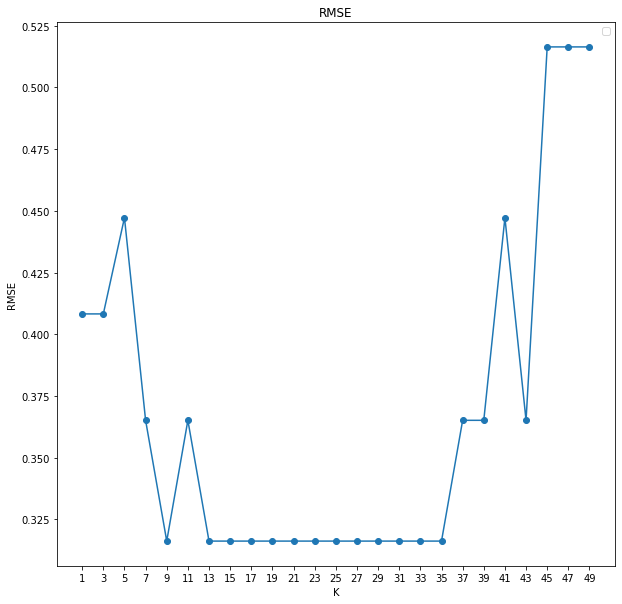

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_num, RMSE_val, "o-")
plt.xticks(np.arange(1, 50, 2))
plt.title('RMSE')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Dapat dilihat nilai k yang optimal terdiri dari 9, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35. Disini nilai RMSE dari k optimal juga tidak 0

In [ ]:
mod = KNN_EuclideanH(9)
mod.fit(x_train, y_train)

y_pred = mod.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:")
print(accuracy)
print("RMSE:")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy:
0.9
RMSE:
0.31622776601683794


Disini kita mendapatkan nilai RMSE dari K optimal adalah 0.31622776601683794

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



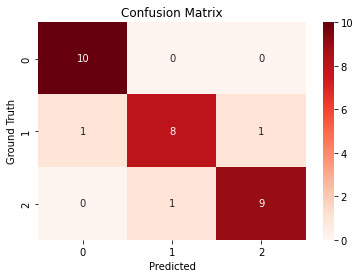

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'Reds', annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()

# Manhattan Distance

In [ ]:
def manhattan_dist(e1, e2):
  return np.sum(np.absolute(e1 - e2))

In [ ]:
class KNN_EuclideanM:
  def __init__(self, k):
    self.k = k
  
  def fit(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

  def predict(self, x_test):
    y_pred = [self._predict(x_test) for x_test in x_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [manhattan_dist(x_test, x_train) for x_train in self.x_train]
    k_near = np.argsort(dist)[:self.k]
    k_near_class = [self.y_train[i] for i in k_near]
    m_c = Counter(k_near_class).most_common(1)
    return m_c[0][0]

In [ ]:
k_num = []
RMSE_val = []

for k in range(1, 50, 2):
  mod = KNN_EuclideanM(k)
  mod.fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  k_num.append(k)
  RMSE_val.append(np.sqrt(mean_squared_error(y_test, y_pred)))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

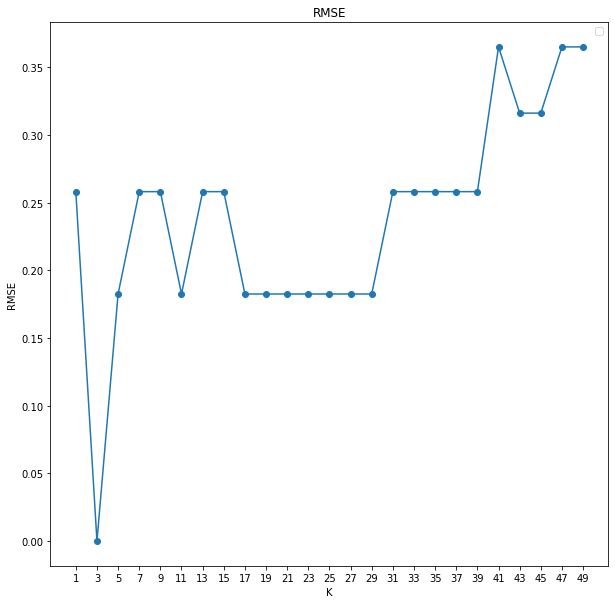

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_num, RMSE_val, "o-")
plt.xticks(np.arange(1, 50, 2))
plt.title('RMSE')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Dapat dilihat, nilai dari k yang optimal adalah 3 dengan RMSE = 0

> Indented block



In [ ]:
mod = KNN_EuclideanM(3)
mod.fit(x_train, y_train)

y_pred = mod.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:")
print(accuracy)
print("RMSE:")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy:
1.0
RMSE:
0.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



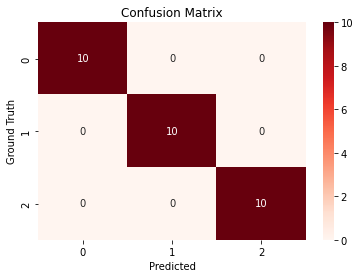

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'Reds', annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()

# Minkowski Distance

In [ ]:
def minkowski_dist(e1, e2, p):
  return np.power(np.sum(np.absolute((e1 - e2)) ** p), 1 / p)

In [ ]:
class KNN_EuclideanMi:
  def __init__(self, k, p):
    self.k = k
    self.p = p
  
  def fit(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

  def predict(self, x_test):
    y_pred = [self._predict(x_test) for x_test in x_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [minkowski_dist(x_test, x_train, self.p) for x_train in self.x_train]
    k_near = np.argsort(dist)[:self.k]
    k_near_class = [self.y_train[i] for i in k_near]
    m_c = Counter(k_near_class).most_common(1)
    return m_c[0][0]

In [ ]:
k_num = []
RMSE_val = []

for k in range(1, 50, 2):
  mod = KNN_EuclideanMi(k, 5)
  mod.fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  k_num.append(k)
  RMSE_val.append(np.sqrt(mean_squared_error(y_test, y_pred)))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

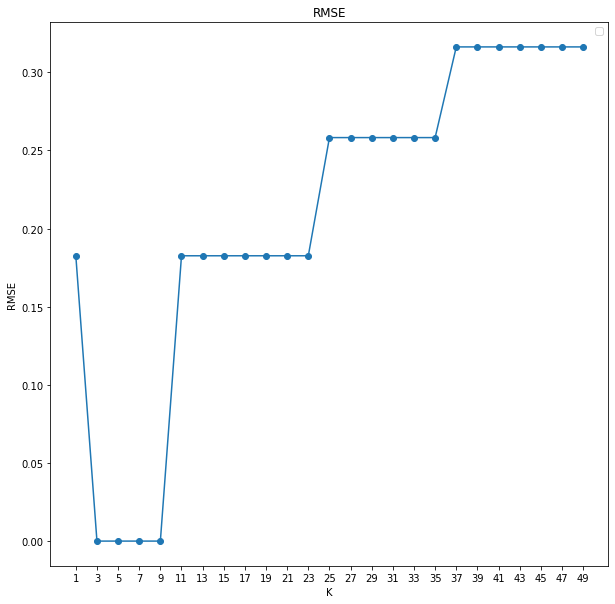

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_num, RMSE_val, "o-")
plt.xticks(np.arange(1, 50, 2))
plt.title('RMSE')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Dapat dilihat, nilai K yang optimal adalah 3, 5, 7, 9 dengan RMSE = 0

In [ ]:
mod = KNN_EuclideanMi(3, 5)
mod.fit(x_train, y_train)

y_pred = mod.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:")
print(accuracy)
print("RMSE:")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy:
1.0
RMSE:
0.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



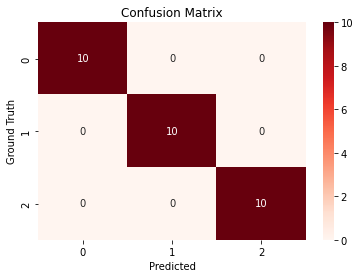

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'Reds', annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()

# 3 

# Regression

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/rocksaint/fruit-data-with-colours/master/fruit_data_with_colours.csv")
data.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
data.shape

(59, 7)

In [ ]:
data = data.drop(['fruit_name', 'fruit_subtype'], axis = 1)

In [ ]:
data.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


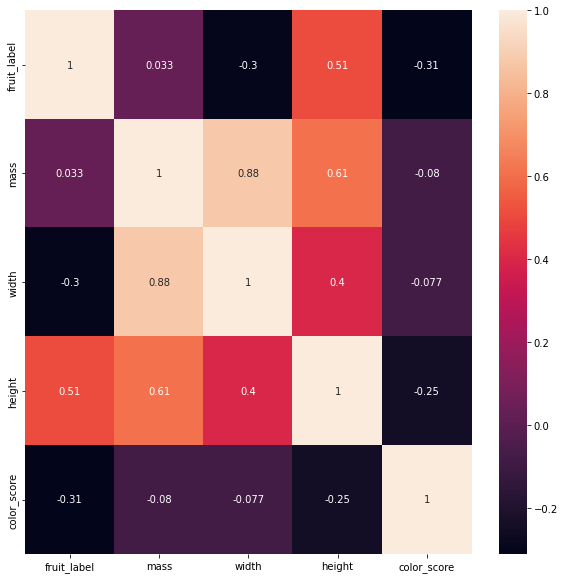

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
x = data.drop('color_score', axis = 1)
y = data['color_score']
x_final = x.values
y_final = y.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, train_size = 0.8, random_state = 42)

In [ ]:
def euclidean_dist(e1, e2):
  return np.sqrt(np.sum((e1 - e2) ** 2))

In [ ]:
class KNN_Euclidean:
  def __init__(self, k):
    self.k = k
  
  def fit(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

  def predict(self, x_test):
    y_pred = [self._predict(x_test) for x_test in x_test]
    return np.array(y_pred)

  def _predict(self, x_test):
    dist = [euclidean_dist(x_test, x_train) for x_train in self.x_train]
    k_near = np.argsort(dist)[:self.k]
    k_near_class = [self.y_train[i] for i in k_near]
    m_c = Counter(k_near_class).most_common(1)
    return m_c[0][0]

In [ ]:
k_num = []
RMSE_val = []

for k in range(1, 50, 2):
  mod = KNN_Euclidean(k)
  mod.fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  k_num.append(k)
  RMSE_val.append(np.sqrt(mean_squared_error(y_test, y_pred)))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

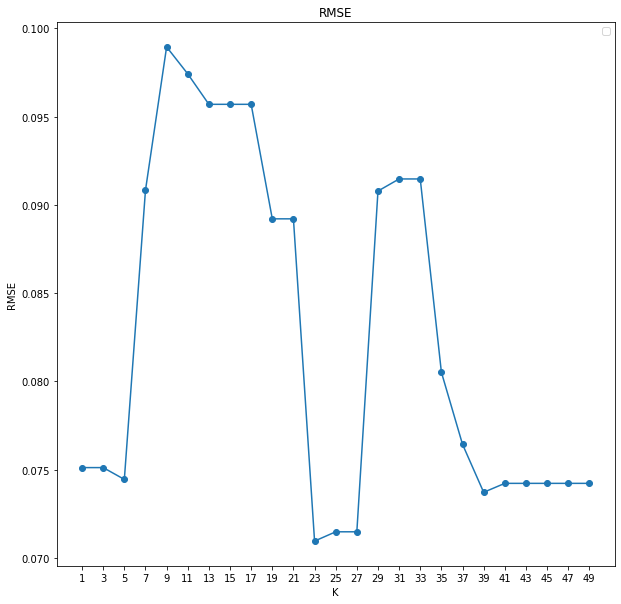

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_num, RMSE_val, "o-")
plt.xticks(np.arange(1, 50, 2))
plt.title('RMSE')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Dapat dilihat, nilai dari k yang paling optimal adalah 23

In [ ]:
mod = KNN_Euclidean(23)
mod.fit(x_train, y_train)
y_pred = mod.predict(x_test)
res = pd.DataFrame({'Predicted': y_pred, 'Ground Truth': y_test})
res.head(12)

,Predicted,Ground Truth
0,0.72,0.55
1,0.72,0.77
2,0.75,0.75
3,0.79,0.70
4,0.79,0.72
5,0.72,0.74
6,0.75,0.72
7,0.74,0.75
8,0.72,0.72
9,0.79,0.88


In [ ]:
print("MSE:")
print(mean_squared_error(y_test, y_pred))
print("RMSE:")
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:")
print(r2_score(y_test, y_pred))

MSE:
0.005033333333333335
RMSE:
0.07094598884597589
R2 score:
0.042662792233522207


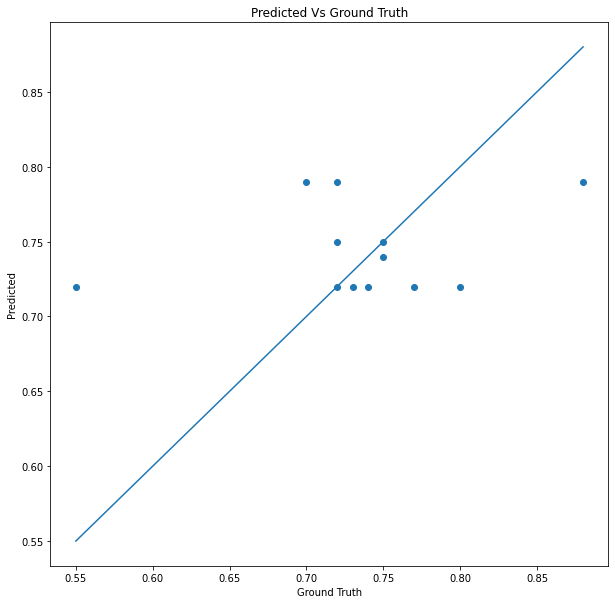

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2])

plt.title("Predicted Vs Ground Truth")
plt.xlabel('Ground Truth')
plt.ylabel('Predicted')
plt.show()

# 4

# Standardization

In [ ]:
scaler = StandardScaler()
x_final_scaled = scaler.fit_transform(x_final)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_final_scaled, y_final, train_size = 0.8, random_state = 42)

In [ ]:
k_num = []
RMSE_val = []
for k in range(1, 50, 2):
  mod = KNN_Euclidean(k)
  mod.fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  k_num.append(k)
  RMSE_val.append(np.sqrt(mean_squared_error(y_test, y_pred)))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

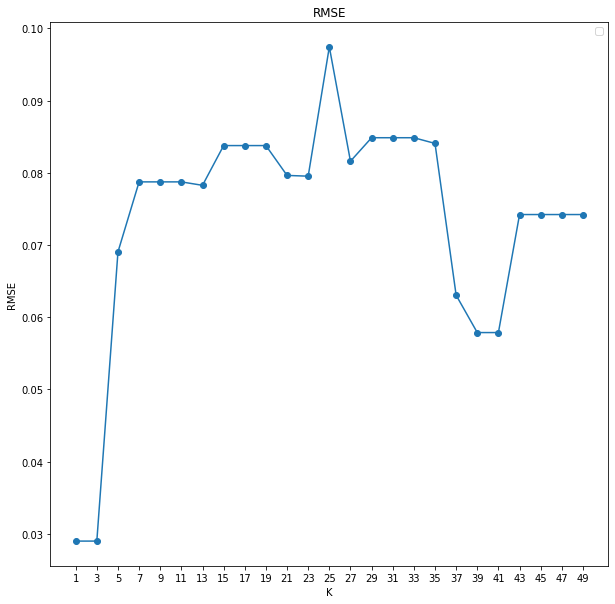

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_num, RMSE_val, "o-")
plt.xticks(np.arange(1, 50, 2))
plt.title('RMSE')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show

Dapat dilihat, nilai k paling optimal adalah 1, 3

In [ ]:
mod = KNN_Euclidean(1)
mod.fit(x_train, y_train)
y_pred = mod.predict(x_test)
res = pd.DataFrame({'Predicted': y_pred, 'Ground Truth': y_test})
res.head(10)

,Predicted,Ground Truth
0,0.59,0.55
1,0.81,0.77
2,0.79,0.75
3,0.73,0.70
4,0.72,0.72
5,0.71,0.74
6,0.71,0.72
7,0.75,0.75
8,0.70,0.72
9,0.93,0.88


In [ ]:
print("MSE:")
print(mean_squared_error(y_test, y_pred))
print("RMSE:")
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:")
print(r2_score(y_test, y_pred))

MSE:
0.0008416666666666675
RMSE:
0.029011491975882032
R2 score:
0.8399154669132214


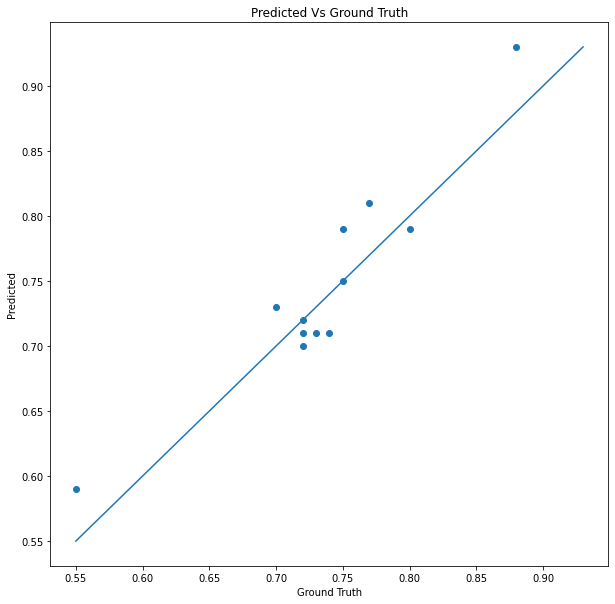

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))

plt.plot([p1, p2], [p1, p2])
plt.title("Predicted Vs Ground Truth")
plt.xlabel('Ground Truth')
plt.ylabel('Predicted')
plt.show()